Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
df=pd.read_excel("/content/form final responses.xlsx")

EDA

In [52]:
df.head()

,Name,Gender,Age,Income,Previous loan,Own house,Own land,jewellery,Loan amount,Duration,loan approved
0,Krutika nikumbh,Female,24,45000,No,Yes,No,Yes,200000,0.5,Yes
1,Siddhant Kumar,Male,45,96000,No,Yes,Yes,Yes,300000,2.0,Yes
2,Sonali,Female,20,60000,Yes,Yes,Yes,Yes,100000,1.0,No
3,Sangita Singh,Female,22,60000,Yes,Yes,No,Yes,1000000,0.3,Yes
4,Mayur,Male,18,35000,No,No,No,No,20000,2.0,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            38 non-null     object 
 1   Gender          38 non-null     object 
 2   Age             38 non-null     int64  
 3   Income          38 non-null     int64  
 4   Previous loan   38 non-null     object 
 5   Own house       38 non-null     object 
 6   Own land        38 non-null     object 
 7   jewellery       38 non-null     object 
 8   Loan amount     38 non-null     int64  
 9   Duration        38 non-null     float64
 10  loan  approved  38 non-null     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.4+ KB


In [54]:
df.shape

(38, 11)

In [55]:
df.dtypes

Name               object
Gender             object
Age                 int64
Income              int64
Previous loan      object
Own house          object
Own land           object
jewellery          object
Loan amount         int64
Duration          float64
loan  approved     object
dtype: object

In [56]:
df.describe()

,Age,Income,Loan amount,Duration
count,38.000000,3.800000e+01,3.800000e+01,38.000000
mean,35.342105,2.919474e+05,6.342895e+06,4.334211
std,11.807639,4.972579e+05,1.838308e+07,4.537845
min,18.000000,1.000000e+04,2.000000e+04,0.300000
25%,25.000000,5.000000e+04,1.000000e+05,1.000000
50%,35.000000,7.650000e+04,3.500000e+05,3.000000
75%,40.750000,4.000000e+05,3.850000e+06,5.000000
max,67.000000,2.000000e+06,1.000000e+08,24.000000


In [57]:
df.describe(include='all')

,Name,Gender,Age,Income,Previous loan,Own house,Own land,jewellery,Loan amount,Duration,loan approved
count,38,38,38.000000,3.800000e+01,38,38,38,38,3.800000e+01,38.000000,38
unique,38,2,NaN,NaN,2,2,2,2,NaN,NaN,2
top,Krutika nikumbh,Female,NaN,NaN,No,Yes,No,Yes,NaN,NaN,Yes
freq,1,22,NaN,NaN,32,24,21,26,NaN,NaN,27
mean,NaN,NaN,35.342105,2.919474e+05,NaN,NaN,NaN,NaN,6.342895e+06,4.334211,NaN
std,NaN,NaN,11.807639,4.972579e+05,NaN,NaN,NaN,NaN,1.838308e+07,4.537845,NaN
min,NaN,NaN,18.000000,1.000000e+04,NaN,NaN,NaN,NaN,2.000000e+04,0.300000,NaN
25%,NaN,NaN,25.000000,5.000000e+04,NaN,NaN,NaN,NaN,1.000000e+05,1.000000,NaN
50%,NaN,NaN,35.000000,7.650000e+04,NaN,NaN,NaN,NaN,3.500000e+05,3.000000,NaN
75%,NaN,NaN,40.750000,4.000000e+05,NaN,NaN,NaN,NaN,3.850000e+06,5.000000,NaN


In [58]:
column_to_delete = 'Name'
df = df.drop(column_to_delete, axis=1)

In [59]:
df.head()

,Gender,Age,Income,Previous loan,Own house,Own land,jewellery,Loan amount,Duration,loan approved
0,Female,24,45000,No,Yes,No,Yes,200000,0.5,Yes
1,Male,45,96000,No,Yes,Yes,Yes,300000,2.0,Yes
2,Female,20,60000,Yes,Yes,Yes,Yes,100000,1.0,No
3,Female,22,60000,Yes,Yes,No,Yes,1000000,0.3,Yes
4,Male,18,35000,No,No,No,No,20000,2.0,Yes


In [60]:
categorical_features = ["Gender","Previous loan", "Own house", "Own land", "jewellery", "loan  approved"]
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [61]:
df.head()

,Gender,Age,Income,Previous loan,Own house,Own land,jewellery,Loan amount,Duration,loan approved
0,0,24,45000,0,1,0,1,200000,0.5,1
1,1,45,96000,0,1,1,1,300000,2.0,1
2,0,20,60000,1,1,1,1,100000,1.0,0
3,0,22,60000,1,1,0,1,1000000,0.3,1
4,1,18,35000,0,0,0,0,20000,2.0,1


                  Gender       Age    Income  Previous loan  Own house  \
Gender          1.000000  0.061878 -0.117008      -0.076932  -0.122126   
Age             0.061878  1.000000 -0.027399      -0.093237   0.045837   
Income         -0.117008 -0.027399  1.000000       0.299505   0.301447   
Previous loan  -0.076932 -0.093237  0.299505       1.000000   0.181108   
Own house      -0.122126  0.045837  0.301447       0.181108   1.000000   
Own land        0.090270 -0.071843  0.140104       0.045835   0.358029   
jewellery      -0.108631  0.204591  0.290686       0.294174   0.302677   
Loan amount     0.010442 -0.104572  0.447883      -0.122130   0.188105   
Duration        0.341063  0.248400 -0.030024      -0.091953   0.008272   
loan  approved -0.043299 -0.120705 -0.127669       0.117254  -0.006331   

                Own land  jewellery  Loan amount  Duration  loan  approved  
Gender          0.090270  -0.108631     0.010442  0.341063       -0.043299  
Age            -0.071843   0.20

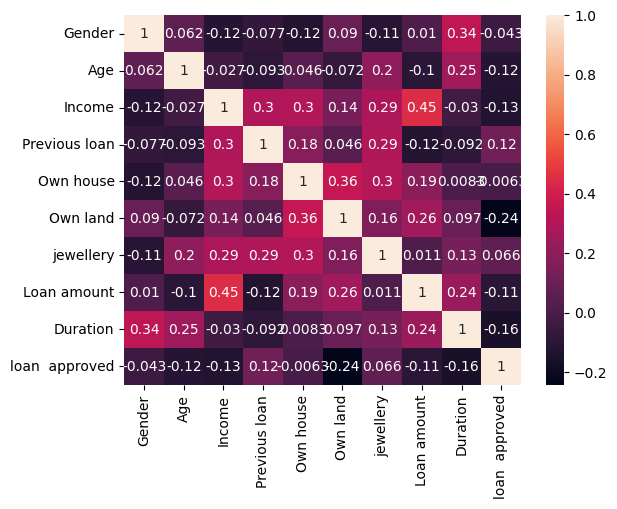

In [62]:
correlation = df.corr()
print(correlation)  # Correlation matrix
sns.heatmap(correlation, annot=True)  # Heatmap visualization
plt.show()

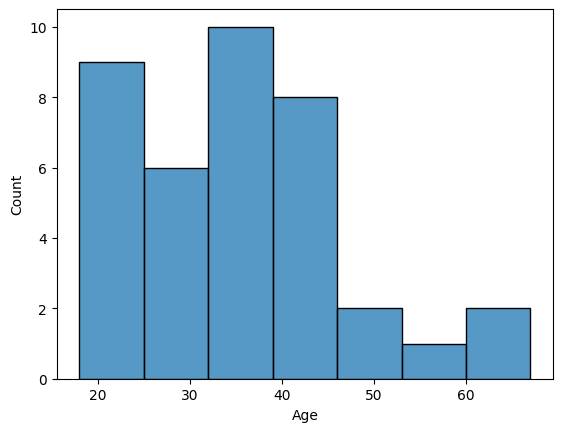

In [63]:
sns.histplot(df['Age'])
plt.show()

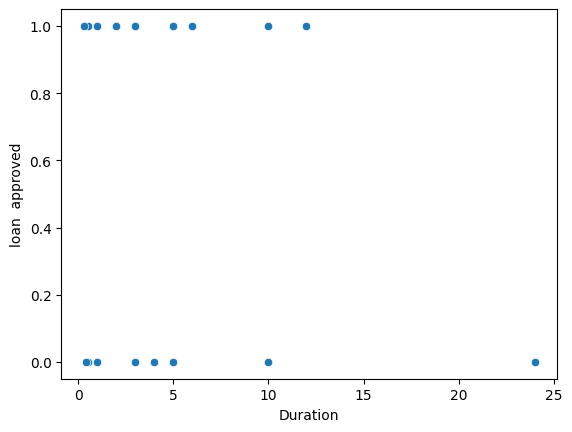

In [64]:
sns.scatterplot(x='Duration', y='loan  approved', data=df)
plt.show()

Model Selection

In [65]:
X = df.drop("loan  approved", axis=1)
y = df["loan  approved"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model building

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred = model.predict(X_test)

Accuracy

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.75


In [70]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [1, 6]])

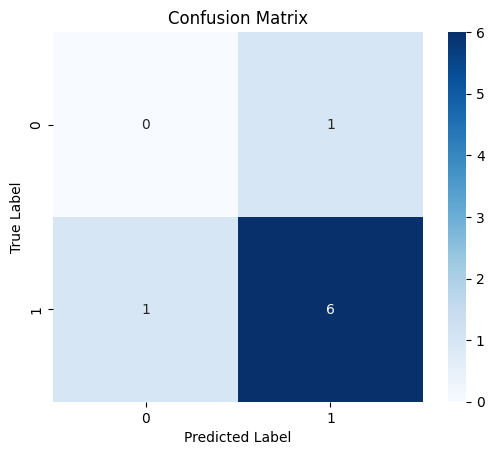

In [71]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [85]:
new_pred=model.predict([[0,19,0,0,0,0,0,50000,1]])
if(new_pred==1):
  print("Loan Approved")
else:
  print("Loan not approved")

Loan not approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [91]:
new_pred=model.predict([[0,39,1000000,0,1,0,0,50000,1]])
if(new_pred==1):
  print("Loan Approved")
else:
  print("Loan not approved")

Loan Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
